In [79]:
import pandas as pd
data = pd.read_csv('ad_campaigns_stats.csv')
data.head()

,group,phrase,effect,ad_id,title,text,link,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,9cc0c5f6ca


В итоге мы хотим построить распределение для ТОП-5 самых часто встречающихся названий кампаний. Давайте сначала узнаем, что это за кампании, а потом отфильтруем датафрейм по этим названиям. Итак, посмотрим ТОП-5 кампаний в нашем датафрейме:

In [80]:
data.campaign.value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

Названия кампаний теперь в индексе полученного датафрейма. Извлечем индекс, используя метод с простым названием index:

In [81]:
data.campaign.value_counts().index

Index(['7f35591a28', '8e77a0e565', '2cc2e7d770', 'f6d2ae1e3d', 'e90f4db55a',
       '7388fb4c7b', 'be97523396', '8d3a748298', 'acc3077e55', '718ce6a065',
       ...
       '5b0c050763', 'f80e902d76', 'd5b16c7769', 'b3f52e6f64', '7b17b2d188',
       '5a7508fa8d', 'da872d1fb4', 'eb577faed1', '63153306ff', 'a117c5fc1b'],
      dtype='object', length=115)

In [82]:
most_popular_campaigns = data.campaign.value_counts().index[:5].tolist()
most_popular_campaigns

['7f35591a28', '8e77a0e565', '2cc2e7d770', 'f6d2ae1e3d', 'e90f4db55a']

In [83]:
lowest_popular_campaigns = data.campaign.value_counts().index[-9:].tolist()
lowest_popular_campaigns

['f80e902d76',
 'd5b16c7769',
 'b3f52e6f64',
 '7b17b2d188',
 '5a7508fa8d',
 'da872d1fb4',
 'eb577faed1',
 '63153306ff',
 'a117c5fc1b']

In [84]:
lowest_popular_campaigns.sort()
lowest_popular_campaigns

['5a7508fa8d',
 '63153306ff',
 '7b17b2d188',
 'a117c5fc1b',
 'b3f52e6f64',
 'd5b16c7769',
 'da872d1fb4',
 'eb577faed1',
 'f80e902d76']

Перед тем, как заняться визуализацией распределения, для простоты отфильтруем исходный датафрейм по ТОП-5 кампаний (уберем лишние строки):

In [85]:
data = data[data['campaign'].isin(most_popular_campaigns)]

In [86]:
data['campaign'].unique()

array(['7f35591a28', '8e77a0e565', '2cc2e7d770', 'f6d2ae1e3d', 'e90f4db55a'], dtype=object)

In [87]:
%matplotlib inline

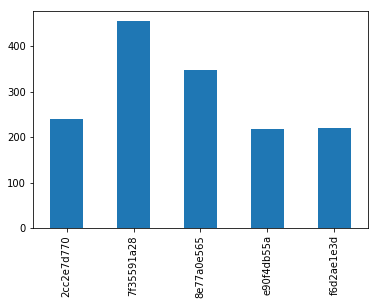

In [88]:
data['campaign'].value_counts().sort_index().plot.bar()

In [ ]:
data['campaign'].hist() #на винде работает, здесь херня

В этом блоке мы посмотрим, как изменять форматирование элементов графиков в Matplotlib. Будем использовать данные по продажам за последние 3 года sales_data.csv. Посмотрим, что есть в файле:

In [89]:
data = pd.read_csv('sales_data.csv', sep=';')
data.head()

,month,2016,2017,2018
0,1,513,465,500
1,2,534,481,523
2,3,608,553,580
3,4,620,561,593
4,5,577,563,600


In [1]:
import matplotlib.pyplot as plt

ImportError: dlopen(/Users/kovaleva/anaconda3/lib/python3.6/site-packages/matplotlib/ft2font.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libfreetype.6.dylib
  Referenced from: /Users/kovaleva/anaconda3/lib/python3.6/site-packages/matplotlib/ft2font.cpython-36m-darwin.so
  Reason: Incompatible library version: ft2font.cpython-36m-darwin.so requires version 22.0.0 or later, but libfreetype.6.dylib provides version 21.0.0

Добавляем нужные данные тремя командами (ось X задаем в первой команде, в остальных добавляем данные по оси Y и получаем графики):

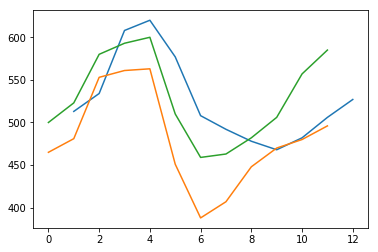

In [68]:
plt.plot(data['month'], data['2016'])
plt.plot(data['2017'])
plt.plot(data['2018'])

Метод plot имеет множество параметров для придания графикам нужного вида. Например, можем добавить маркеры на график 2016 года и изменить тип линии у графика 2017 года:

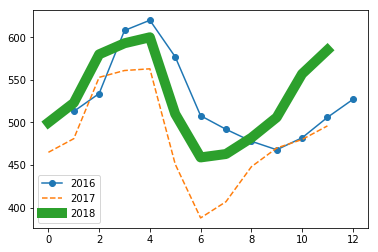

In [69]:
plt.plot(data['month'], data['2016'], marker='o')
plt.plot(data['2017'], linestyle='dashed')
plt.plot(data['2018'], linewidth = '10')
plt.legend()

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

Python-библиотеки для визуализаций позволяют не только рисовать простые графики и распределения, но и быстро получать наглядные отображения структуры данных. В этом блоке мы вспомним понятие корреляции и визуализируем так называемую матрицу корреляций между признаками.

Это популярный прием в машинном обучении для быстрого выделения зависимых признаков в датасете.

Для визуализаций будем использовать библиотеку Seaborn. Насколько сложные графики можно сделать с помощью этой библиотеки, вы можете посмотреть в галерее Seaborn.

In [70]:
import pandas as pd
features = pd.read_csv('correlation.tsv', sep='\t')
features.head()

,month,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,2018-01-01,7,185,385,-129,2260,98,245,1250,214,415
1,2018-01-02,7,108,79,-142,3280,113,149,1161,123,376
2,2018-01-03,8,214,80,-151,410,141,297,1315,146,397
3,2018-01-04,8,81,372,-160,1289,46,447,1389,200,253
4,2018-01-05,9,113,144,-173,1297,67,413,938,129,489


Датасет представляет собой таблицу из десяти признаков p1, p2... p10 по месяцам. Для исследования зависимостей между признаками уберем из датафрейма столбец month:

In [71]:
features.drop('month', axis=1, inplace=True)

In [72]:
features.corr()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
p1,1.000000,0.249489,0.619757,-0.999524,0.587943,0.433063,0.577808,0.967058,0.466873,0.945575
p2,0.249489,1.000000,0.113910,-0.248287,0.141641,0.126832,0.078979,0.262559,0.012126,0.256899
p3,0.619757,0.113910,1.000000,-0.620411,0.309102,0.320015,0.382502,0.607829,0.249586,0.606912
p4,-0.999524,-0.248287,-0.620411,1.000000,-0.586430,-0.432828,-0.579732,-0.968715,-0.463727,-0.945416
p5,0.587943,0.141641,0.309102,-0.586430,1.000000,0.155944,0.297214,0.571159,0.269545,0.537990
p6,0.433063,0.126832,0.320015,-0.432828,0.155944,1.000000,0.313817,0.411173,0.255341,0.422155
p7,0.577808,0.078979,0.382502,-0.579732,0.297214,0.313817,1.000000,0.573135,0.286736,0.559694
p8,0.967058,0.262559,0.607829,-0.968715,0.571159,0.411173,0.573135,1.000000,0.433534,0.911911
p9,0.466873,0.012126,0.249586,-0.463727,0.269545,0.255341,0.286736,0.433534,1.000000,0.453852
p10,0.945575,0.256899,0.606912,-0.945416,0.537990,0.422155,0.559694,0.911911,0.453852,1.000000


Сделаем короткое отступление. Тема корреляции и зависимости переменных очень важна, т. к. часто это приводит к неверным выводам. К сожалению, в общем случае только по значению коэффициента корреляции между величинами A и B мы ничего не можем сказать о зависимости B от A хотя бы потому, что, если корреляция между A и B равна, например, 0.9, то и корреляция между B и A тоже равна 0.9. Рассмотрим три примера, когда коэффициент корреляции вводит нас в заблуждение:

1. Количество пожарных машин в регионе коррелирует с количеством пожаров. Однако глупо будет утверждать, что количество машин определяет количество пожаров. В данном случае мы путаем причину и следствие.

2. Интеллект школьника коррелирует с размером его обуви. Здесь правильнее сказать, что интеллект и размер обуви зависят от возраста. Т. е. мы упускаем влияние третьей переменной — возраста.

3. Невероятно, но факт: показатель количества разводов в штате Мэн коррелирует с потреблением маргарина на душу населения с коэффициентом 99.26%. Это просто совпадение. Вы можете найти много других примеров мистических корреляций на сайте www.tylervigen.com.

Читать матрицу корреляций для десяти признаков неудобно. Давайте визуализируем нашу таблицу с помощью heatmap. Т. е. в зависимости от величины корреляции необходимо давать ячейке определенную градацию цвета. Для этого импортируем необходимые библиотеки:

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

Создаем пространство для визуализации удобного нам размера и рисуем heatmap для датафрейма features:

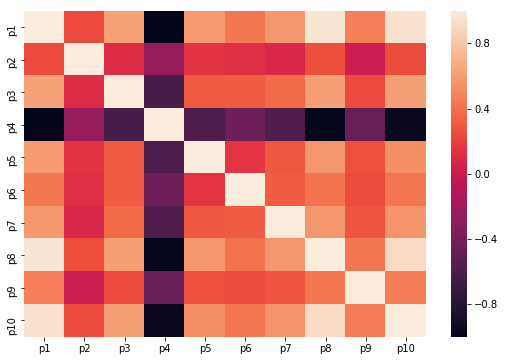

In [74]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(features.corr())

Укажем детали нашей визуализации, чтобы она стала более наглядной:

1. Добавим подписи данных с помощью параметра annot=True.

2. Уточним формат подписи fmt='.1f'.

3. Выберем другую цветовую палитру с помощью параметра cmap. Палитры можно выбрать http://seaborn.pydata.org/tutorial/color_palettes.html

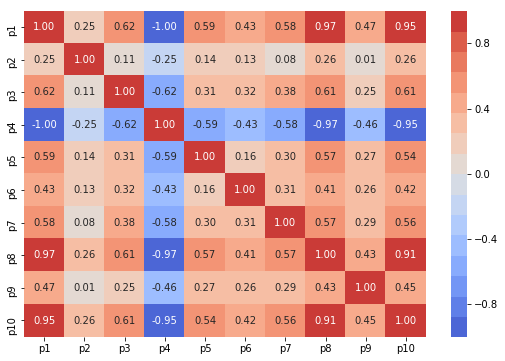

In [75]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(features.corr(), annot=True, fmt='.2f', ax=ax, cmap=sns.color_palette('coolwarm', 16))

In [92]:
import plotly

In [93]:
import pandas as pd
data = pd.read_csv('sales_data.csv', sep=';')
data.head()

,month,2016,2017,2018
0,1,513,465,500
1,2,534,481,523
2,3,608,553,580
3,4,620,561,593
4,5,577,563,600


In [94]:
import plotly
plotly.tools.set_credentials_file(username='sofikovali', api_key='RaK6hmfEQ6cH7ep1Hv1i')

Plotly является коммерческим продуктом, поэтому для контроля использования (в том числе бесплатного) необходимо к каждому запросу добавлять авторизационный токен. Для его получения делаем следующее:

1. Регистрируемся на plot.ly.

2. После прохождения регистрации заходим в настройки API  и генерим токен для запросов

In [95]:
import plotly.plotly as py
import plotly.graph_objs as go
trace = go.Table(
    header=dict(values=list(data.columns),
                fill = dict(color='#C2D4FF'),
                align = ['left', 'right', 'right', 'right']),
    cells=dict(values=[data['month'], data['2016'], data['2017'], data['2018']],
               fill = dict(color='#F5F8FF'),
               align = ['left'] + ['right']*3))
py.iplot([trace], filename = 'pandas_table')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sofikovali/0 or inside your plot.ly account where it is named 'pandas_table'
